In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
from sklearn import datasets 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
obesity_dataset = pd.read_csv('../DataSource/ObesityDataSet_raw_and_data_sinthetic.csv')
print(obesity_dataset)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [4]:
obesity_dataset.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [5]:
obesity_dataset.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [3]:
obesity_dataset = obesity_dataset.drop("Height", axis=1)
obesity_dataset = obesity_dataset.drop("Weight", axis=1)

In [7]:
obesity_dataset.shape

(2111, 15)

In [12]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.cluster import KMeans, AgglomerativeClustering

In [5]:
gender_label_encoder = preprocessing.LabelEncoder()
obesity_dataset['Gender'] = gender_label_encoder.fit_transform(obesity_dataset['Gender'])
obesity_dataset['Gender'].unique()

array([0, 1])

In [6]:
mapping = {
    'no': 0,
    'yes': 1
}
obesity_dataset['family_history_with_overweight'] = obesity_dataset['family_history_with_overweight'].map(mapping)
obesity_dataset['FAVC'] = obesity_dataset['FAVC'].map(mapping)
obesity_dataset['SMOKE'] = obesity_dataset['SMOKE'].map(mapping)
obesity_dataset['SCC'] = obesity_dataset['SCC'].map(mapping)

In [7]:
caec_label_encoder = preprocessing.LabelEncoder()
obesity_dataset['CAEC'] = caec_label_encoder.fit_transform(obesity_dataset['CAEC'])
obesity_dataset['CAEC'].unique()

array([2, 1, 0, 3])

In [8]:
calc_label_encoder = preprocessing.LabelEncoder()
obesity_dataset['CALC'] = calc_label_encoder.fit_transform(obesity_dataset['CALC'])
obesity_dataset['CALC'].unique()

array([3, 2, 1, 0])

In [9]:
mtrans_label_encoder = preprocessing.LabelEncoder()
obesity_dataset['MTRANS'] = mtrans_label_encoder.fit_transform(obesity_dataset['MTRANS'])
obesity_dataset['MTRANS'].unique()

array([3, 4, 0, 2, 1])

In [10]:
nobeysdad_label_encoder = preprocessing.LabelEncoder()
obesity_dataset['NObeyesdad'] = nobeysdad_label_encoder.fit_transform(obesity_dataset['NObeyesdad'])
obesity_dataset['NObeyesdad'].unique()

array([1, 5, 6, 2, 0, 3, 4])

In [11]:
obesity_dataset 

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [16]:
age_mean_values = obesity_dataset["Age"].mean()
print(f"Average Age of participants of the study: " + "\n", str(age_mean_values))

Average Age of participants of the study: 
 24.312599908574136


In [17]:
mean_time_using_tech = obesity_dataset["TUE"].mean()
print(f"Average hours spent using technology: " + "\n", str(mean_time_using_tech))

Average hours spent using technology: 
 0.657865923732828


In [18]:
mean_vegetables_consumption = obesity_dataset['FCVC'].mean()
print(f"Average consumption of vegetables: " + "\n", str(mean_vegetables_consumption))

Average consumption of vegetables: 
 2.4190430615821885


In [19]:
mean_water_consumption = obesity_dataset['CH2O'].mean()
print(f"Average water consumption (in litre): " + "\n", str(mean_water_consumption))

Average water consumption (in litre): 
 2.0080114040738986


In [37]:
mean_physical_activity = obesity_dataset['FAF'].mean()
print(f"Average days of physical activity: ", "\n", str(mean_physical_activity))

Average days of physical activity:  
 1.0102976958787304


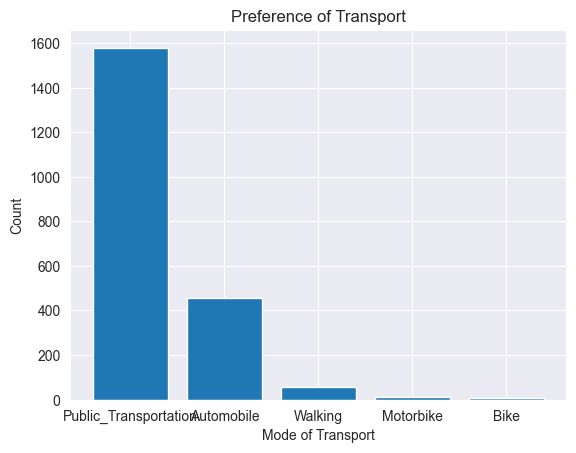

In [34]:
count = obesity_dataset['MTRANS'].value_counts()
y_pos = np.arange(len(count))

original_labels = mtrans_label_encoder.inverse_transform(count.index)

plt.bar(y_pos, count, align='center', alpha=1)
plt.xticks(y_pos, original_labels)
plt.ylabel('Count')
plt.xlabel('Mode of Transport')
plt.title('Preference of Transport')
plt.show()

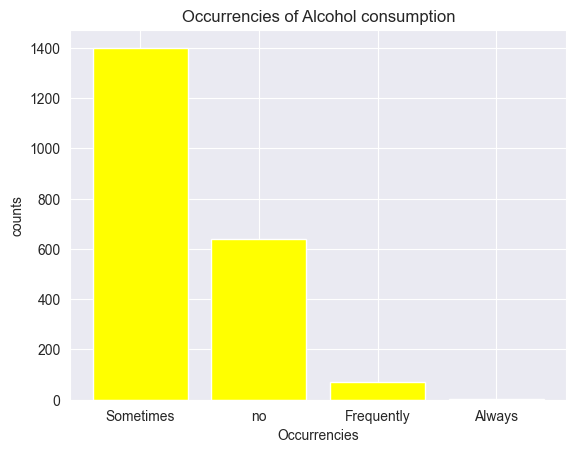

In [47]:
calc_count = obesity_dataset['CALC'].value_counts()
y_pos = np.arange(len(calc_count))

calc_original_labels = calc_label_encoder.inverse_transform(calc_count.index)

plt.bar(y_pos, calc_count, align='center', alpha=1, color='yellow')
plt.xticks(y_pos, calc_original_labels)
plt.ylabel('counts')
plt.xlabel('Occurrencies')
plt.title('Occurrencies of Alcohol consumption')
plt.show()

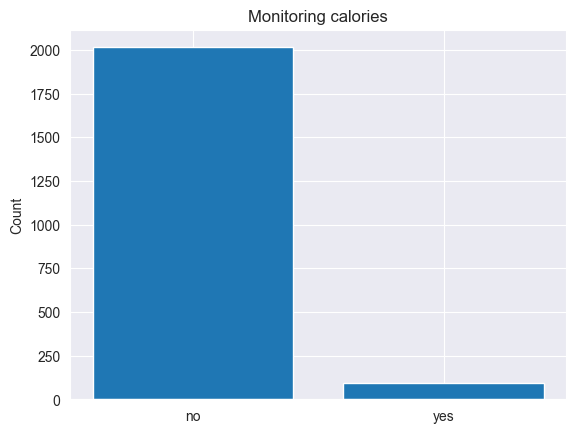

In [23]:
reverse_mapping = {
    0: 'no',
    1: 'yes'
}
calories_monitor_count = obesity_dataset['SCC'].value_counts()
y_pos = np.arange(len(calories_monitor_count))

calories_original_labels = calories_monitor_count.index.map(reverse_mapping)
plt.bar(y_pos, calories_monitor_count, align='center', alpha=1)
plt.xticks(y_pos, calories_original_labels)
plt.ylabel('Count')
plt.title('Monitoring calories')
plt.show()

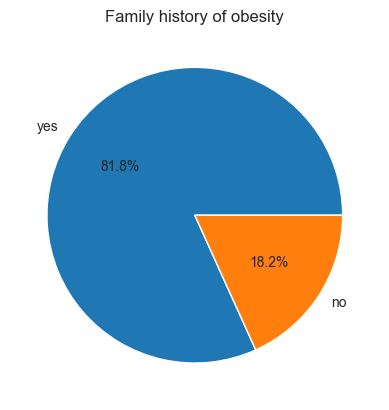

In [24]:
history_count = obesity_dataset['family_history_with_overweight'].value_counts()
history_original_labls = list(history_count.index.map(reverse_mapping))
plt.pie(history_count, labels=history_original_labls, autopct='%1.1f%%')
plt.title('Family history of obesity')
plt.show()

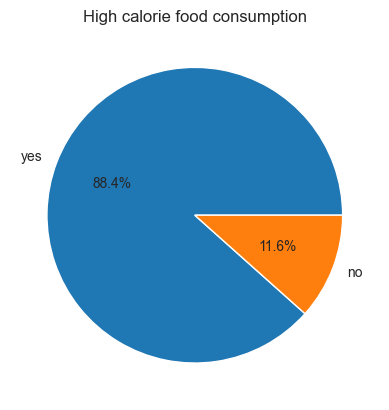

In [25]:
favc_count = obesity_dataset['FAVC'].value_counts()
original_favc_labels = list(favc_count.index.map(reverse_mapping))
plt.pie(favc_count, labels=original_favc_labels, autopct='%1.1f%%')
plt.title('High calorie food consumption')
plt.show()

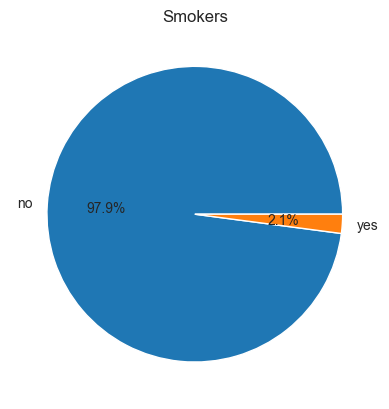

In [26]:
smoke_count = obesity_dataset['SMOKE'].value_counts()
original_smoke_labels = list(smoke_count.index.map(reverse_mapping))
plt.pie(smoke_count, labels=original_smoke_labels, autopct='%1.1f%%')
plt.title('Smokers')
plt.show()

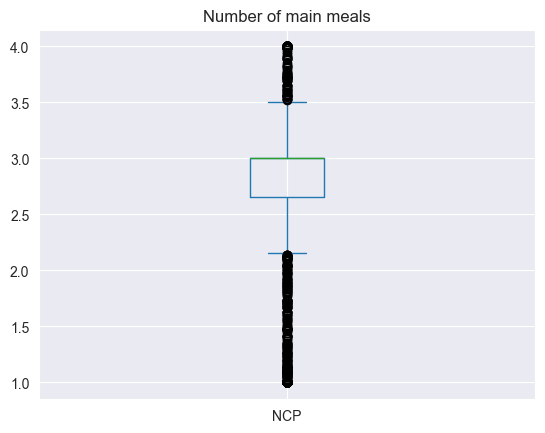

In [50]:
obesity_dataset['NCP'].plot(kind='box')
plt.title('Number of main meals')
plt.show()

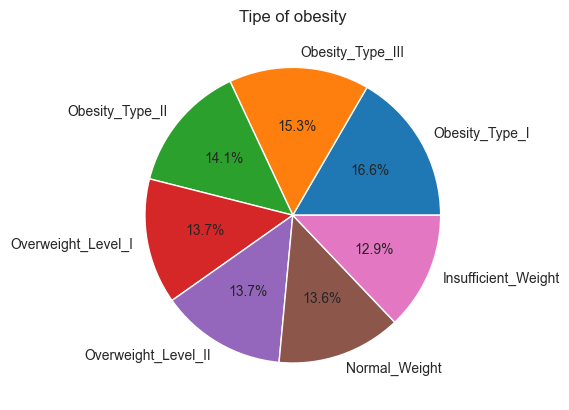

In [28]:
nobeyesdad_count = obesity_dataset['NObeyesdad'].value_counts()
original_obesity_label = nobeysdad_label_encoder.inverse_transform(nobeyesdad_count.index)
plt.pie(nobeyesdad_count, labels= original_obesity_label, autopct='%1.1f%%')

plt.title('Tipe of obesity')
plt.show()

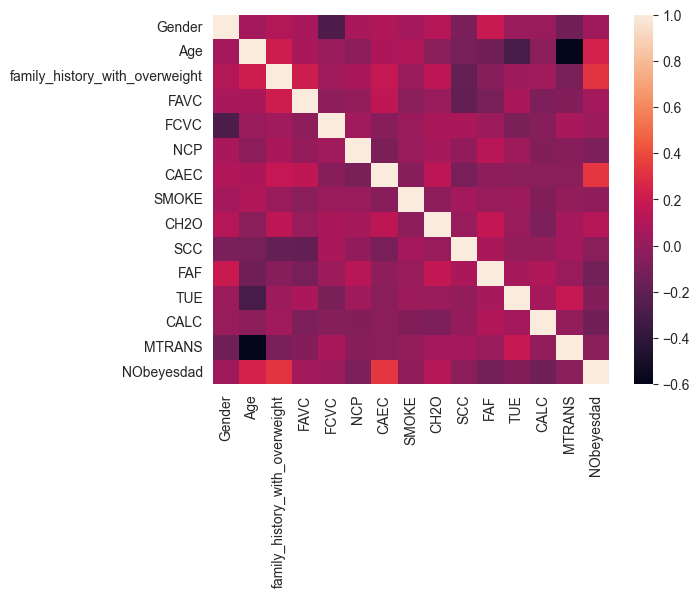

In [30]:
import seaborn as sns
correlation = obesity_dataset.corr()
sns.heatmap(correlation)
plt.show()

In [31]:
target_variable = 'NObeyesdad'
corr_specific_target = correlation[target_variable].sort_values(ascending=False)
print(f'Top Positive correlation with {target_variable}: \n', corr_specific_target.head(10))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'Top Negative correlation with {target_variable}: \n', corr_specific_target.tail(10))

Top Positive correlation with NObeyesdad: 
 NObeyesdad                        1.000000
CAEC                              0.327295
family_history_with_overweight    0.313667
Age                               0.236170
CH2O                              0.108868
FAVC                              0.044582
Gender                            0.024908
FCVC                              0.018522
SMOKE                            -0.023256
MTRANS                           -0.046202
Name: NObeyesdad, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~
Top Negative correlation with NObeyesdad: 
 FAVC      0.044582
Gender    0.024908
FCVC      0.018522
SMOKE    -0.023256
MTRANS   -0.046202
SCC      -0.050679
TUE      -0.069448
NCP      -0.092616
FAF      -0.129564
CALC     -0.134632
Name: NObeyesdad, dtype: float64


Silhouette Score (for 2 cluster): 0.6105953790490493
Completeness Score: 0.20371969745923638
Homogeneity Score: 0.05294210742374558
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


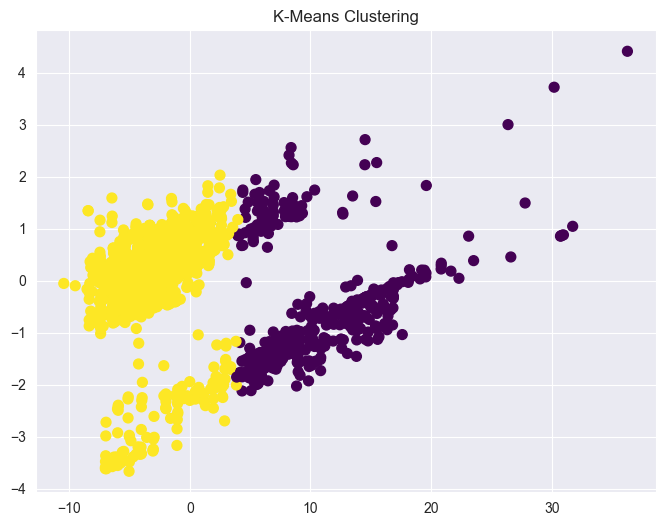

Silhouette Score (for 3 cluster): 0.4369862937153076
Completeness Score: 0.21388325448076814
Homogeneity Score: 0.10108362458520272
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


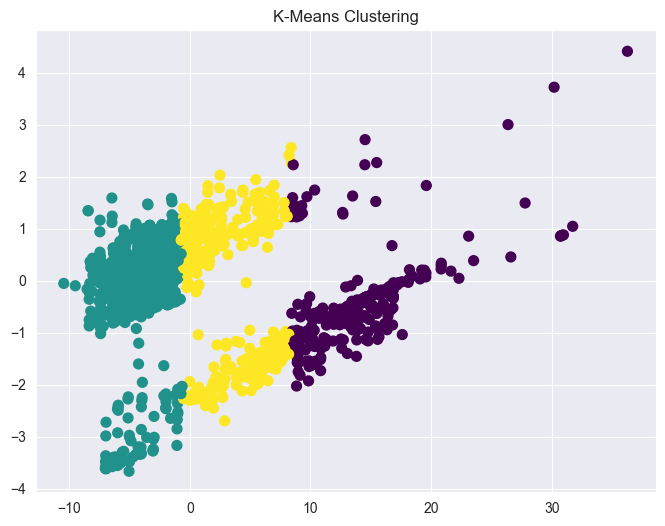

Silhouette Score (for 4 cluster): 0.38418018475668825
Completeness Score: 0.175438699131245
Homogeneity Score: 0.10674752808832802
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


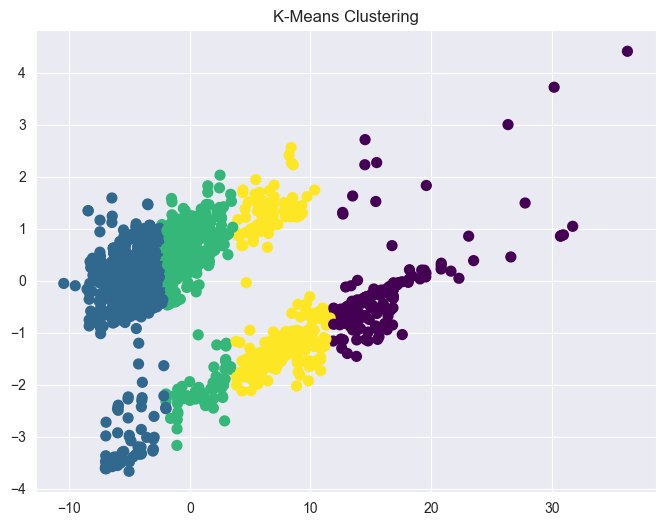

Silhouette Score (for 5 cluster): 0.31621600733193
Completeness Score: 0.17011039761788213
Homogeneity Score: 0.13082926267705514
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


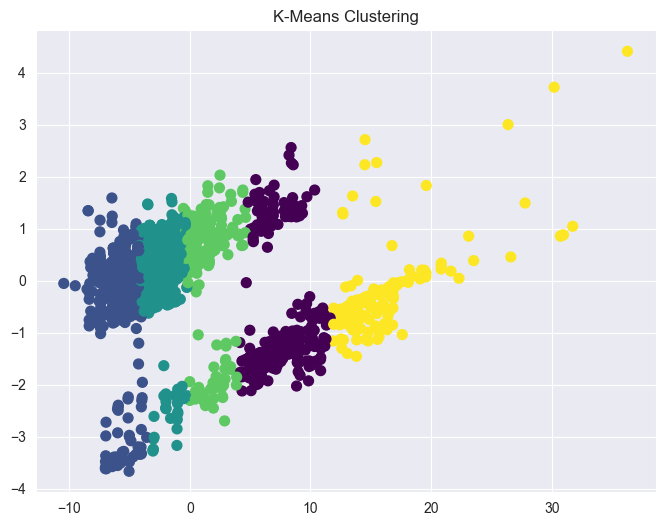

Silhouette Score (for 6 cluster): 0.3177688520020557
Completeness Score: 0.17588577677360323
Homogeneity Score: 0.1385215057769645
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


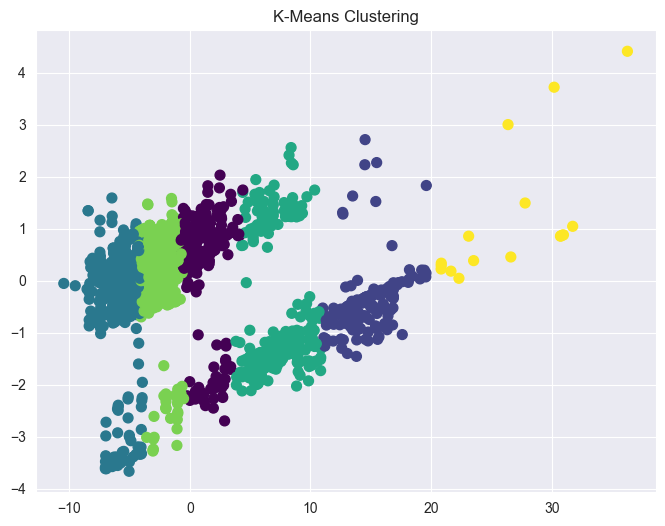

Silhouette Score (for 7 cluster): 0.2547609350984889
Completeness Score: 0.16597640003232705
Homogeneity Score: 0.15055275927130715
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


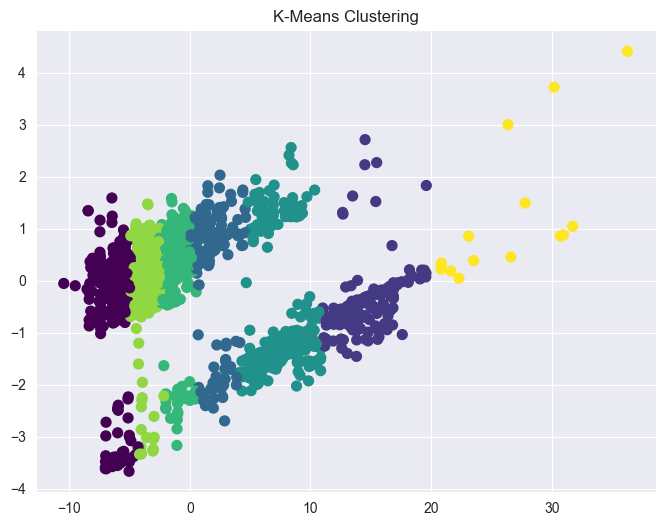

Silhouette Score (for 8 cluster): 0.2952767760304977
Completeness Score: 0.167066518692653
Homogeneity Score: 0.14294775806766086
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


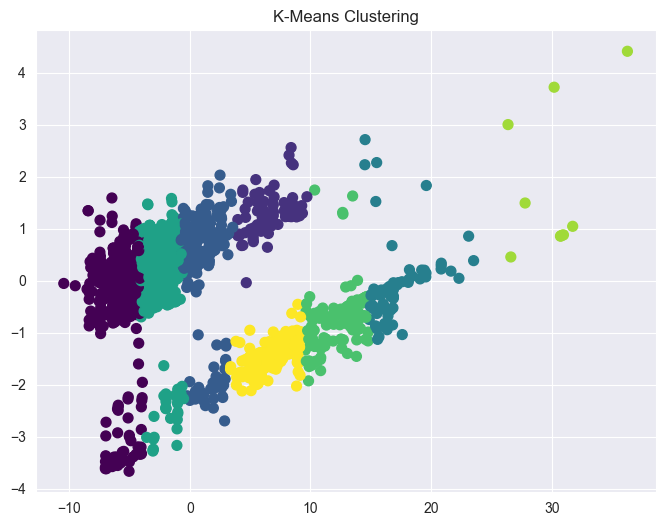

Silhouette Score (for 9 cluster): 0.22280954096807895
Completeness Score: 0.15856069920574362
Homogeneity Score: 0.16149746813930788
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


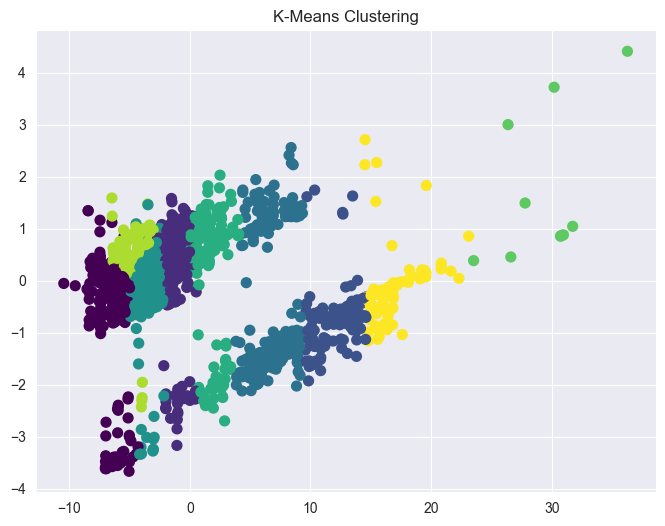

In [34]:
from sklearn.decomposition import PCA
unlabelled = obesity_dataset.drop(columns=['NObeyesdad'])
label = obesity_dataset['NObeyesdad']

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(unlabelled)
    print(f"Silhouette Score (for {i} cluster): {silhouette_score(unlabelled, kmeans.labels_)}")
    print(f"Completeness Score: {completeness_score(label, kmeans.labels_)}")
    print(f"Homogeneity Score: {homogeneity_score(label, kmeans.labels_)}")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    cluster_labels = kmeans.labels_
    pca = PCA(n_components=2)
    unlabelled_pca = pca.fit_transform(unlabelled)

    plt.figure(figsize=(8, 6))
    plt.scatter(unlabelled_pca[:, 0], unlabelled_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.title("K-Means Clustering")

    plt.show()
    

Cluster labels:  [4 3 3 ... 7 7 7]


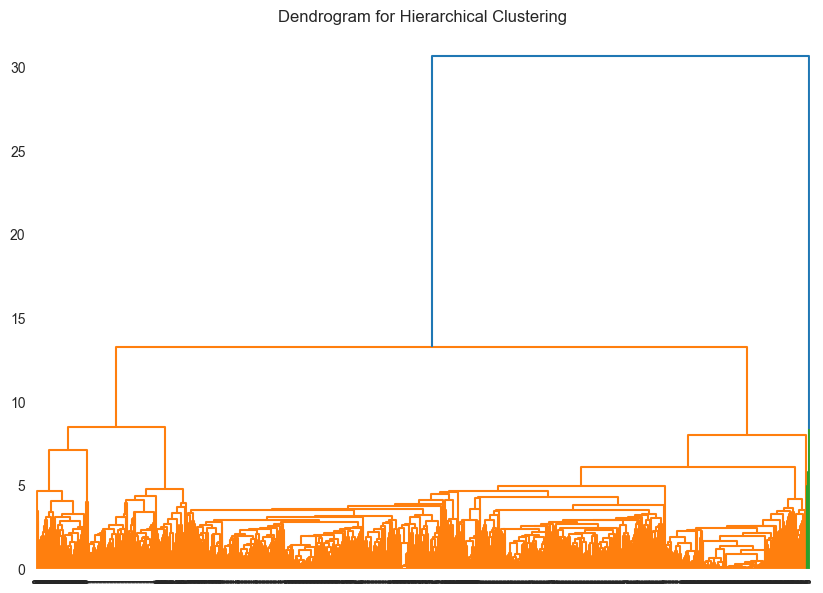

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=10)
agg_cluster_labels = agg.fit_predict(unlabelled)
print("Cluster labels: ", agg_cluster_labels)

linkage = linkage(unlabelled, method='average')

plt.figure(figsize=(10, 7))
dendrogram(linkage, labels=agg_cluster_labels, orientation='top', distance_sort='descending')
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

#this seems not to be appropriate for this dataset

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import numpy as np

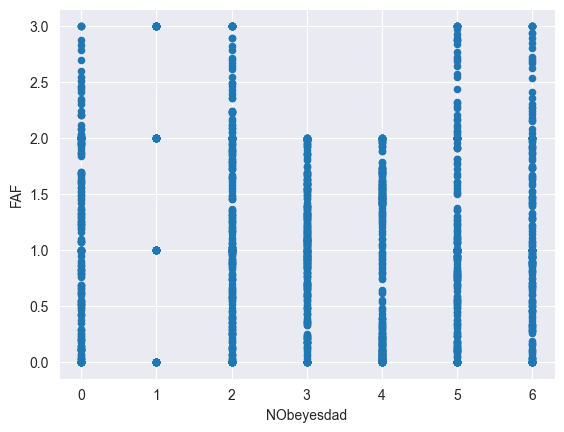

In [49]:
obesity_dataset.plot(kind='scatter', x='NObeyesdad', y='FAF')
plt.show()

In [51]:
linear_model = LinearRegression()
X = np.c_[obesity_dataset['NObeyesdad']]
y = obesity_dataset['FAF']
linear_model.fit(X, y)

LinearRegression()

In [37]:
X, y = unlabelled, label
X.shape, y.shape

((2111, 14), (2111,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

sgd_class = SGDClassifier(random_state=42)
sgd_class.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)